In [1]:
import numpy
print(numpy.__version__)

1.24.4


In [2]:
import pandas as pd
import numpy as np
np.bool = bool  # temporary compatibility shim
from pathlib import Path
import os
import matplotlib.pyplot as plt
import seaborn as sns


Bad key text.latex.preview in file c:\Users\34663\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.7.5/lib/matplotlib/mpl-data/matplotlibrc
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file c:\Users\34663\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.7.5/lib/matplotlib/mpl-data/matplotlibrc
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file c:\Users\34663\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg is saved, the default 

In [3]:
# Load train.csv
data_dir = Path("../data_processed")
train_df = pd.read_csv(data_dir / "all_features_with_macro.csv", index_col=0, parse_dates=True)

print(f"TData shape: {train_df.shape}")
print(f"Date range: {train_df.index.min()} to {train_df.index.max()}")
print(f"\nColumns: {list(train_df.columns)}")
print(f"\nFirst few rows:")
train_df.head()


TData shape: (6110, 38)
Date range: 2001-01-22 00:00:00 to 2025-11-20 00:00:00

Columns: ['LOPBDY LME Comdty', 'returns', 'MA7', 'MA30', 'rolling_volatility', 'EMA5', 'EMA15', 'EMA30', 'MACD5', 'MACD15', 'MACD30', 'RSI', 'BB_upper', 'BB_middle', 'BB_lower', 'return_7d', 'target', 'future_return', 'future_MA7', 'future_MA30', 'future_rolling_volatility', 'future_return_7d', 'dxy_return_7d', 'yield_change_7d', 'dxy_ma_diff_20_5', 'copper_return_7d', 'wti_return_7d', 'lead_to_copper_ratio', 'copper_ma_diff_20_5', 'copper_vol_7d', 'wti_vol_7d', 'corr_lead_copper_30d', 'corr_lead_dxy_30d', 'IDF', 'divergence_lc', 'oil_dxy_interaction', 'joint_momentum', 'regime_dxy_yield']

First few rows:


,LOPBDY LME Comdty,returns,MA7,MA30,rolling_volatility,EMA5,EMA15,EMA30,MACD5,MACD15,...,copper_ma_diff_20_5,copper_vol_7d,wti_vol_7d,corr_lead_copper_30d,corr_lead_dxy_30d,IDF,divergence_lc,oil_dxy_interaction,joint_momentum,regime_dxy_yield
Date,,,,,,,,,,,,,,,,,,,,,
2001-01-22,484.0,0.016807,466.642857,465.850000,0.016046,472.477942,468.758402,466.470573,5.445235,1.725695,...,-0.002127,0.021711,0.024679,0.227243,-0.225959,0.053504,0.000993,0.000293,0.045518,1.0
2001-01-23,494.0,0.020661,470.428571,466.750000,0.016374,479.651961,471.913602,468.246665,10.621677,2.883317,...,-0.002719,0.021711,0.041656,0.217905,-0.193981,0.012298,0.037864,0.000027,0.082308,1.0
2001-01-24,490.5,-0.007085,473.857143,467.533333,0.016455,483.267974,474.236902,469.682364,12.647340,3.616268,...,-0.000371,0.021846,0.041362,0.227842,-0.223879,-0.019303,0.054526,-0.000706,0.043869,1.0
2001-01-25,489.0,-0.003058,479.000000,468.383333,0.016389,485.178650,476.082289,470.928663,13.196581,4.100221,...,0.001295,0.019527,0.041402,0.233019,-0.223084,-0.007825,0.062501,-0.000444,0.096440,1.0
2001-01-26,500.0,0.022495,485.642857,469.933333,0.016184,490.119100,479.072003,472.804233,16.061629,5.014532,...,0.002259,0.019397,0.040938,0.239768,-0.214631,0.006702,0.093516,0.000026,0.111556,1.0


In [4]:
# Extract features (X) - exclude target variables
irr_cols = ['LOPBDY LME Comdty', 'return_7d', 'target', 'Date']
X = train_df.drop(columns=irr_cols, errors='ignore')

print(f"Feature matrix X shape: {X.shape}")
print(f"Number of features: {X.shape[1]}")
print(f"\nFeature columns:")
print(list(X.columns))
print(f"\nFirst few rows of X:")
X.head()

Feature matrix X shape: (6110, 35)
Number of features: 35

Feature columns:
['returns', 'MA7', 'MA30', 'rolling_volatility', 'EMA5', 'EMA15', 'EMA30', 'MACD5', 'MACD15', 'MACD30', 'RSI', 'BB_upper', 'BB_middle', 'BB_lower', 'future_return', 'future_MA7', 'future_MA30', 'future_rolling_volatility', 'future_return_7d', 'dxy_return_7d', 'yield_change_7d', 'dxy_ma_diff_20_5', 'copper_return_7d', 'wti_return_7d', 'lead_to_copper_ratio', 'copper_ma_diff_20_5', 'copper_vol_7d', 'wti_vol_7d', 'corr_lead_copper_30d', 'corr_lead_dxy_30d', 'IDF', 'divergence_lc', 'oil_dxy_interaction', 'joint_momentum', 'regime_dxy_yield']

First few rows of X:


,returns,MA7,MA30,rolling_volatility,EMA5,EMA15,EMA30,MACD5,MACD15,MACD30,...,copper_ma_diff_20_5,copper_vol_7d,wti_vol_7d,corr_lead_copper_30d,corr_lead_dxy_30d,IDF,divergence_lc,oil_dxy_interaction,joint_momentum,regime_dxy_yield
Date,,,,,,,,,,,,,,,,,,,,,
2001-01-22,0.016807,466.642857,465.850000,0.016046,472.477942,468.758402,466.470573,5.445235,1.725695,-0.562134,...,-0.002127,0.021711,0.024679,0.227243,-0.225959,0.053504,0.000993,0.000293,0.045518,1.0
2001-01-23,0.020661,470.428571,466.750000,0.016374,479.651961,471.913602,468.246665,10.621677,2.883317,-0.783619,...,-0.002719,0.021711,0.041656,0.217905,-0.193981,0.012298,0.037864,0.000027,0.082308,1.0
2001-01-24,-0.007085,473.857143,467.533333,0.016455,483.267974,474.236902,469.682364,12.647340,3.616268,-0.938270,...,-0.000371,0.021846,0.041362,0.227842,-0.223879,-0.019303,0.054526,-0.000706,0.043869,1.0
2001-01-25,-0.003058,479.000000,468.383333,0.016389,485.178650,476.082289,470.928663,13.196581,4.100221,-1.053405,...,0.001295,0.019527,0.041402,0.233019,-0.223084,-0.007825,0.062501,-0.000444,0.096440,1.0
2001-01-26,0.022495,485.642857,469.933333,0.016184,490.119100,479.072003,472.804233,16.061629,5.014532,-1.253237,...,0.002259,0.019397,0.040938,0.239768,-0.214631,0.006702,0.093516,0.000026,0.111556,1.0


Explained Variance Ratio for first 20 components:
PC1: 0.2883 (28.83%)
PC2: 0.1622 (16.22%)
PC3: 0.0741 (7.41%)
PC4: 0.0722 (7.22%)
PC5: 0.0513 (5.13%)
PC6: 0.0465 (4.65%)
PC7: 0.0392 (3.92%)
PC8: 0.0335 (3.35%)
PC9: 0.0308 (3.08%)
PC10: 0.0291 (2.91%)
PC11: 0.0258 (2.58%)
PC12: 0.0251 (2.51%)
PC13: 0.0218 (2.18%)
PC14: 0.0211 (2.11%)
PC15: 0.0200 (2.00%)
PC16: 0.0134 (1.34%)
PC17: 0.0129 (1.29%)
PC18: 0.0109 (1.09%)
PC19: 0.0086 (0.86%)
PC20: 0.0064 (0.64%)

Cumulative variance for first 20 components: 0.8273 (82.73%)

Top 20 Features based on PCA:
             Feature  Importance
    dxy_ma_diff_20_5    3.320700
       dxy_return_7d    3.288762
       copper_vol_7d    3.264889
lead_to_copper_ratio    3.264183
       future_return    3.207454
   corr_lead_dxy_30d    3.138140
             returns    3.098813
 copper_ma_diff_20_5    3.066122
     yield_change_7d    3.049712
 oil_dxy_interaction    2.972233
corr_lead_copper_30d    2.968954
          wti_vol_7d    2.910981
       divergen

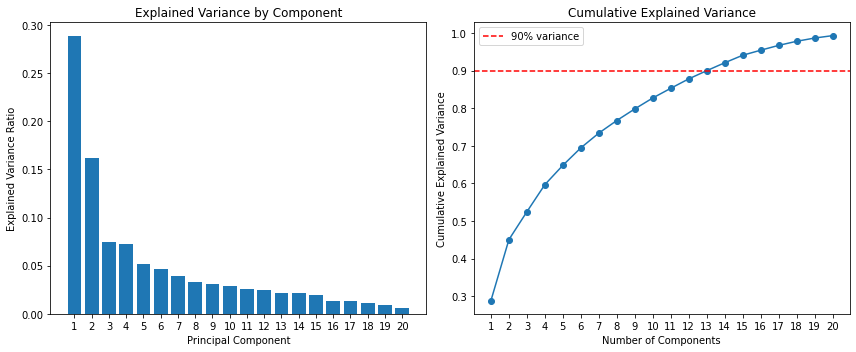

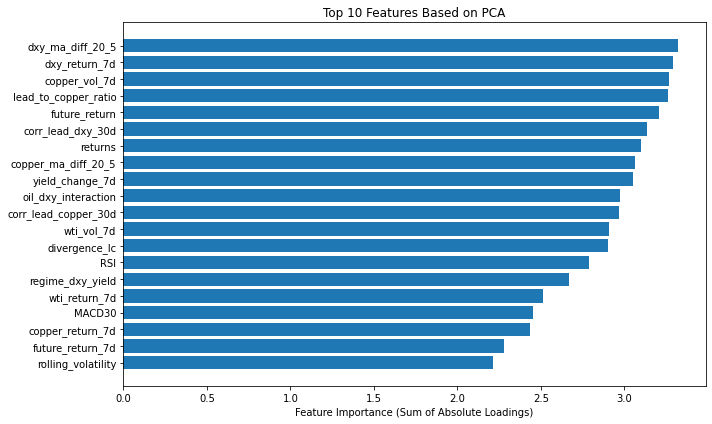


Top 20 Feature Names:
['dxy_ma_diff_20_5', 'dxy_return_7d', 'copper_vol_7d', 'lead_to_copper_ratio', 'future_return', 'corr_lead_dxy_30d', 'returns', 'copper_ma_diff_20_5', 'yield_change_7d', 'oil_dxy_interaction', 'corr_lead_copper_30d', 'wti_vol_7d', 'divergence_lc', 'RSI', 'regime_dxy_yield', 'wti_return_7d', 'MACD30', 'copper_return_7d', 'future_return_7d', 'rolling_volatility']


In [ ]:
# PCA Analysis to determine top 20 features
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the features (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Get explained variance ratio
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Print explained variance for first 20 components
print("Explained Variance Ratio for first 20 components:")
for i in range(min(20, len(explained_variance))):
    print(f"PC{i+1}: {explained_variance[i]:.4f} ({explained_variance[i]*100:.2f}%)")

print(f"\nCumulative variance for first 20 components: {cumulative_variance[9]:.4f} ({cumulative_variance[9]*100:.2f}%)")

# Get component loadings (correlations between features and principal components)
component_loadings = pca.components_.T  # Transpose to get features x components

# Calculate feature importance based on absolute loadings across top components
# We'll use the first 20 components to determine top features
n_components_to_use = min(20, len(pca.components_))
feature_importance = np.abs(component_loadings[:, :n_components_to_use]).sum(axis=1)

# Create DataFrame with feature importance
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
}).sort_values('Importance', ascending=False)

print(f"\nTop 20 Features based on PCA:")
print(feature_importance_df.head(20).to_string(index=False))

# Visualize explained variance
plt.figure(figsize=(12, 5))

# Plot 1: Explained variance per component
plt.subplot(1, 2, 1)
plt.bar(range(1, min(21, len(explained_variance)+1)), explained_variance[:20])
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Component')
plt.xticks(range(1, min(21, len(explained_variance)+1)))

# Plot 2: Cumulative explained variance
plt.subplot(1, 2, 2)
plt.plot(range(1, min(21, len(cumulative_variance)+1)), cumulative_variance[:20], marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance')
plt.axhline(y=0.90, color='r', linestyle='--', label='90% variance')
plt.legend()
plt.xticks(range(1, min(21, len(cumulative_variance)+1)))

plt.tight_layout()
plt.show()

# Visualize top 20 features
plt.figure(figsize=(10, 6))
top_20_features = feature_importance_df.head(20)
plt.barh(range(len(top_20_features)), top_20_features['Importance'].values)
plt.yticks(range(len(top_20_features)), top_20_features['Feature'].values)
plt.xlabel('Feature Importance (Sum of Absolute Loadings)')
plt.title('Top 10 Features Based on PCA')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Store top 20 feature names
top_20_feature_names = top_20_features['Feature'].tolist()
print(f"\nTop 20 Feature Names:")
print(top_20_feature_names)


In [7]:
# Features data description
stat = X.describe(percentiles=[.01,.05,.5,.95,.99]).T
stat['missing'] = X.isna().sum()
stat['skew'] = X.skew(numeric_only=True)
stat['kurt'] = X.kurt(numeric_only=True)

# IQR outliers (outside [Q1-3*IQR, Q3+3*IQR])
q1, q3 = X.quantile(.25), X.quantile(.75)
iqr = q3 - q1
out_mask = (X.lt(q1 - 3*iqr)) | (X.gt(q3 + 3*iqr))
stat['outliers_iqr3'] = out_mask.sum()

# Robust MAD z-score (good for heavy tails)
med = X.median()
mad = (X - med).abs().median() * 1.4826
mad_z = (X - med).div(mad.replace(0, np.nan)).abs()
stat['outliers_mad5'] = (mad_z > 5).sum()

stat.sort_values('outliers_mad5', ascending=False)

,count,mean,std,min,1%,5%,50%,95%,99%,max,missing,skew,kurt,outliers_iqr3,outliers_mad5
oil_dxy_interaction,6110.0,-0.000162,0.001123,-0.022800,-0.003542,-0.001492,-0.000033,0.000877,0.002362,0.012188,0,-4.225763,80.298666,354,354
wti_vol_7d,6110.0,0.022929,0.042681,0.002151,0.006261,0.008562,0.018648,0.043527,0.076475,1.230410,0,24.420035,663.626716,144,135
MACD15,6110.0,1.297182,30.651979,-185.453805,-99.680294,-43.614407,1.745265,43.602108,85.062939,187.758830,0,-0.464842,6.446088,121,107
copper_ma_diff_20_5,6110.0,-0.005118,0.078526,-0.413485,-0.217655,-0.126543,-0.005128,0.120760,0.242236,0.510191,0,0.458334,5.086981,118,104
MACD30,6110.0,-0.470984,9.402044,-55.188039,-26.463186,-13.653813,-0.518982,12.936916,32.145024,52.342105,0,0.456341,6.099656,112,103
copper_vol_7d,6110.0,0.015173,0.008577,0.002204,0.004604,0.006477,0.013270,0.030557,0.048936,0.086613,0,2.652147,12.280658,98,98
MACD5,6110.0,2.435635,68.018248,-429.321706,-212.440108,-99.044994,2.912487,98.551493,190.401322,430.302862,0,-0.368123,6.143219,112,96
future_rolling_volatility,6110.0,0.016650,0.007703,0.005172,0.006516,0.008375,0.014438,0.031979,0.043821,0.056590,0,1.614125,3.360254,41,88
rolling_volatility,6110.0,0.017675,0.007862,0.004329,0.007598,0.009434,0.015128,0.033905,0.042219,0.060838,0,1.656334,3.556543,34,86
wti_return_7d,6110.0,0.002419,0.076914,-2.592467,-0.163615,-0.097594,0.005791,0.093982,0.160796,0.908428,0,-6.573363,240.767303,41,38


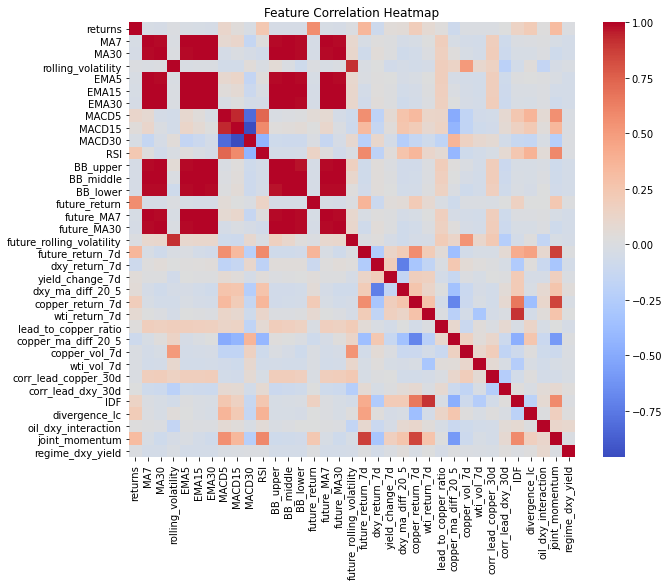

In [8]:
# Set path to store figures
figure_path = Path("../src/interpretation")

# plot the heatmap for feaature correlaation
corr = X.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=False, cmap="coolwarm")

plt.title("Feature Correlation Heatmap")

# save the figure
plt.savefig(os.path.join(figure_path, "feature_corr_heatmap.png"), dpi=300, bbox_inches="tight")

plt.show()

HIGH CORRELATION PAIRS IN TOP 20 PCA FEATURES

No high correlation pairs found (|correlation| > 0.85) among top 20 PCA features.


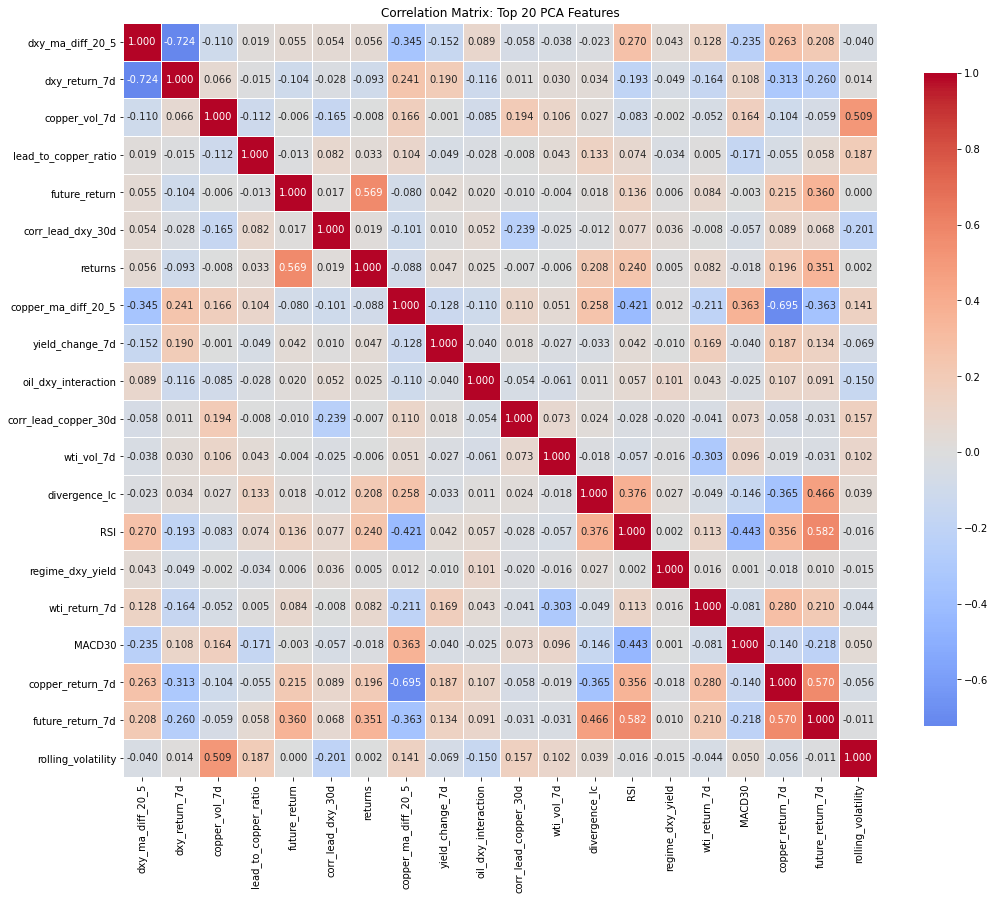

In [11]:
# Check high correlation among top 10 features from first PCA (Cell 4)
# Filter high correlation pairs to only include pairs where both features are in top 10

# Top 20 features from first PCA (Cell 4)
top_20_pca_features = ['dxy_ma_diff_20_5', 'dxy_return_7d', 'copper_vol_7d', 
                       'lead_to_copper_ratio', 'future_return', 'corr_lead_dxy_30d', 'returns', 
                       'copper_ma_diff_20_5', 'yield_change_7d', 'oil_dxy_interaction', 
                       'corr_lead_copper_30d', 'wti_vol_7d', 'divergence_lc', 'RSI', 
                       'regime_dxy_yield', 'wti_return_7d', 'MACD30', 'copper_return_7d', 
                       'future_return_7d', 'rolling_volatility']

# Get correlation matrix for all features
corr_matrix = X.corr()

# Find high correlation pairs among top 10 PCA features
top_20_high_corr_pairs = []
for i in top_20_pca_features:
    for j in top_20_pca_features:
        if i < j:  # Only check upper triangle to avoid duplicates
            if i in corr_matrix.columns and j in corr_matrix.columns:
                corr_val = corr_matrix.loc[i, j]
                if abs(corr_val) > 0.85:  # High correlation threshold
                    top_20_high_corr_pairs.append({
                        'Feature1': i,
                        'Feature2': j,
                        'Correlation': corr_val
                    })

# Convert to DataFrame for better display
if top_20_high_corr_pairs:
    top_20_high_corr_df = pd.DataFrame(top_20_high_corr_pairs)
    top_20_high_corr_df = top_20_high_corr_df.sort_values('Correlation', key=abs, ascending=False)
    
    print("="*60)
    print("HIGH CORRELATION PAIRS IN TOP 20 PCA FEATURES")
    print("="*60)
    print(f"\nFound {len(top_20_high_corr_pairs)} high correlation pairs (|correlation| > 0.85):\n")
    print(top_20_high_corr_df.to_string(index=False))
    
    print(f"\nSummary:")
    print(f"  Total high correlation pairs in top 20: {len(top_20_high_corr_pairs)}")
    print(f"  Positive correlations: {(top_20_high_corr_df['Correlation'] > 0).sum()}")
    print(f"  Negative correlations: {(top_20_high_corr_df['Correlation'] < 0).sum()}")
    if len(top_20_high_corr_df) > 0:
        print(f"  Max correlation: {top_20_high_corr_df['Correlation'].abs().max():.4f}")
        print(f"  Min correlation: {top_20_high_corr_df['Correlation'].abs().min():.4f}")
    
    # Visualize correlation matrix for top 20 features
    plt.figure(figsize=(10, 8))
    top_20_corr = corr_matrix.loc[top_20_pca_features, top_20_pca_features]
    sns.heatmap(top_20_corr, annot=True, fmt='.3f', cmap='coolwarm', center=0, 
                square=True, linewidths=1, cbar_kws={"shrink": 0.8})
    plt.title('Correlation Matrix: Top 20 PCA Features')
    plt.tight_layout()
    
    # Save the figure
    figure_path = Path("../src/interpretation")
    plt.savefig(os.path.join(figure_path, "top10_pca_features_correlation.png"), dpi=300, bbox_inches="tight")
    plt.show()
    
    # Save high correlation pairs to CSV
    output_path = Path("../src/data/top20_pca_high_correlation_pairs.csv")
    top_20_high_corr_df.to_csv(output_path, index=False)
    print(f"\nHigh correlation pairs saved to: {output_path}")
else:
    print("="*60)
    print("HIGH CORRELATION PAIRS IN TOP 20 PCA FEATURES")
    print("="*60)
    print("\nNo high correlation pairs found (|correlation| > 0.85) among top 20 PCA features.")
    
    # Still show correlation matrix for visualization
    plt.figure(figsize=(15, 13))
    top_20_corr = corr_matrix.loc[top_20_pca_features, top_20_pca_features]
    sns.heatmap(top_20_corr, annot=True, fmt='.3f', cmap='coolwarm', center=0, 
                square=True, linewidths=1, cbar_kws={"shrink": 0.8})
    plt.title('Correlation Matrix: Top 20 PCA Features')
    plt.tight_layout()
    plt.show()

